# Gisette Dataset
#####  GISETTE is a handwritten digit recognition problem.
#####  The problem is to separate the highly confusible digits '4' and '9'.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import csv
import sklearn
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Reducing the dataset using Principal Component Analysis:

#### Info regarding the data:

In [2]:
print(f'Some info on the provided Gisette data:\n')
with open('gisette.param') as csvfile:
    for row in csv.reader(csvfile):
        print(row[0])

Some info on the provided Gisette data:

Data type: non-sparse
Number of features: 5000
Number of examples and check-sums:
     	Pos_ex	Neg_ex	Tot_ex	Check_sum
Train	 3000	 3000	 6000	3164568508.00
Valid	  500	  500	 1000	535016668.00
Test	 3250	 3250	 6500	3431572010.00
All  	 6750	 6750	13500	7131157186.00


###### The provided dataset has labels available only for Train and Valid datasets so we made the decision to use Train dataset with its labels to train our machine and then check our machine's performance on the Valid dataset and its labels

#### Reading the Training Dataset and cleaning as needed

In [3]:
gisette_train_data = pd.read_csv('gisette_train.data', delimiter=' ', header=None)
gisette_train_data = gisette_train_data.dropna(axis=1, how='all')

gisette_train_data

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,550,0,495,0,0,0,0,976,0,0,...,0,0,0,991,991,0,0,0,0,983
1,0,0,0,0,0,0,0,976,0,0,...,0,475,0,991,0,0,991,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,0,674,0,0,838
4,0,0,0,0,0,0,0,608,0,979,...,991,0,0,828,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,991,0,0,0,0,0,783,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,921,0,886,0
5997,0,0,0,0,0,758,0,0,0,522,...,0,901,0,0,0,0,980,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,690,0,0,0,0,0


#### Reading True Positive & Negative Values (Labels) for the Training Dataset

In [4]:
gisette_train_labels = pd.read_csv('gisette_train.labels', delimiter=' ', header=None)

gisette_train_labels

,0
0,1
1,-1
2,1
3,1
4,1
...,...
5995,-1
5996,1
5997,-1
5998,-1


#### Experimenting with PCA

In [5]:
from sklearn.decomposition import PCA

#---running PCA capturing 100% variability of the data---
pca = PCA()

#---performing PCA on the data---
pca.fit(gisette_train_data)

PCA()

In [6]:
#---getting variances from the Principal Component Analysis---

#---Variances for the top 10 contributing components---
df_10_var = pd.DataFrame({'Principal Component': [x+1 for x in range(10)],
                           'Regular Variances':
                          pca.explained_variance_ratio_[[x for x in range(10)]]*100})
df_10_var.index = df_10_var.index + 1

#---Cumulative Variances for every 500th component---
cum_var_features = [0,499,999,1499,1999,2499,2999,3499,3999,4499,4999]
df_cum_var = pd.DataFrame({'Principal Component': [x+1 for x in cum_var_features],
                           'Cumulative Variances': 
                           pca.explained_variance_ratio_.cumsum()[cum_var_features]*100})
df_cum_var.index = df_cum_var.index + 1

In [7]:
#---printing the explained variances---
print("Regular Variances (Percentage):")
df_10_var

Regular Variances (Percentage):


,Principal Component,Regular Variances
1,1,5.111313
2,2,3.733727
3,3,3.023898
4,4,2.326494
5,5,2.109193
6,6,1.705387
7,7,1.479375
8,8,1.282750
9,9,1.102118
10,10,0.955059


In [8]:
#---printing the explained cumulative variances---
print("Cumulative Variances (Percentage):")
df_cum_var

Cumulative Variances (Percentage):


,Principal Component,Cumulative Variances
1,1,5.111313
2,500,66.873663
3,1000,83.827664
4,1500,92.441109
5,2000,96.620063
6,2500,98.569556
7,3000,99.453533
8,3500,99.826127
9,4000,99.962054
10,4500,99.997152


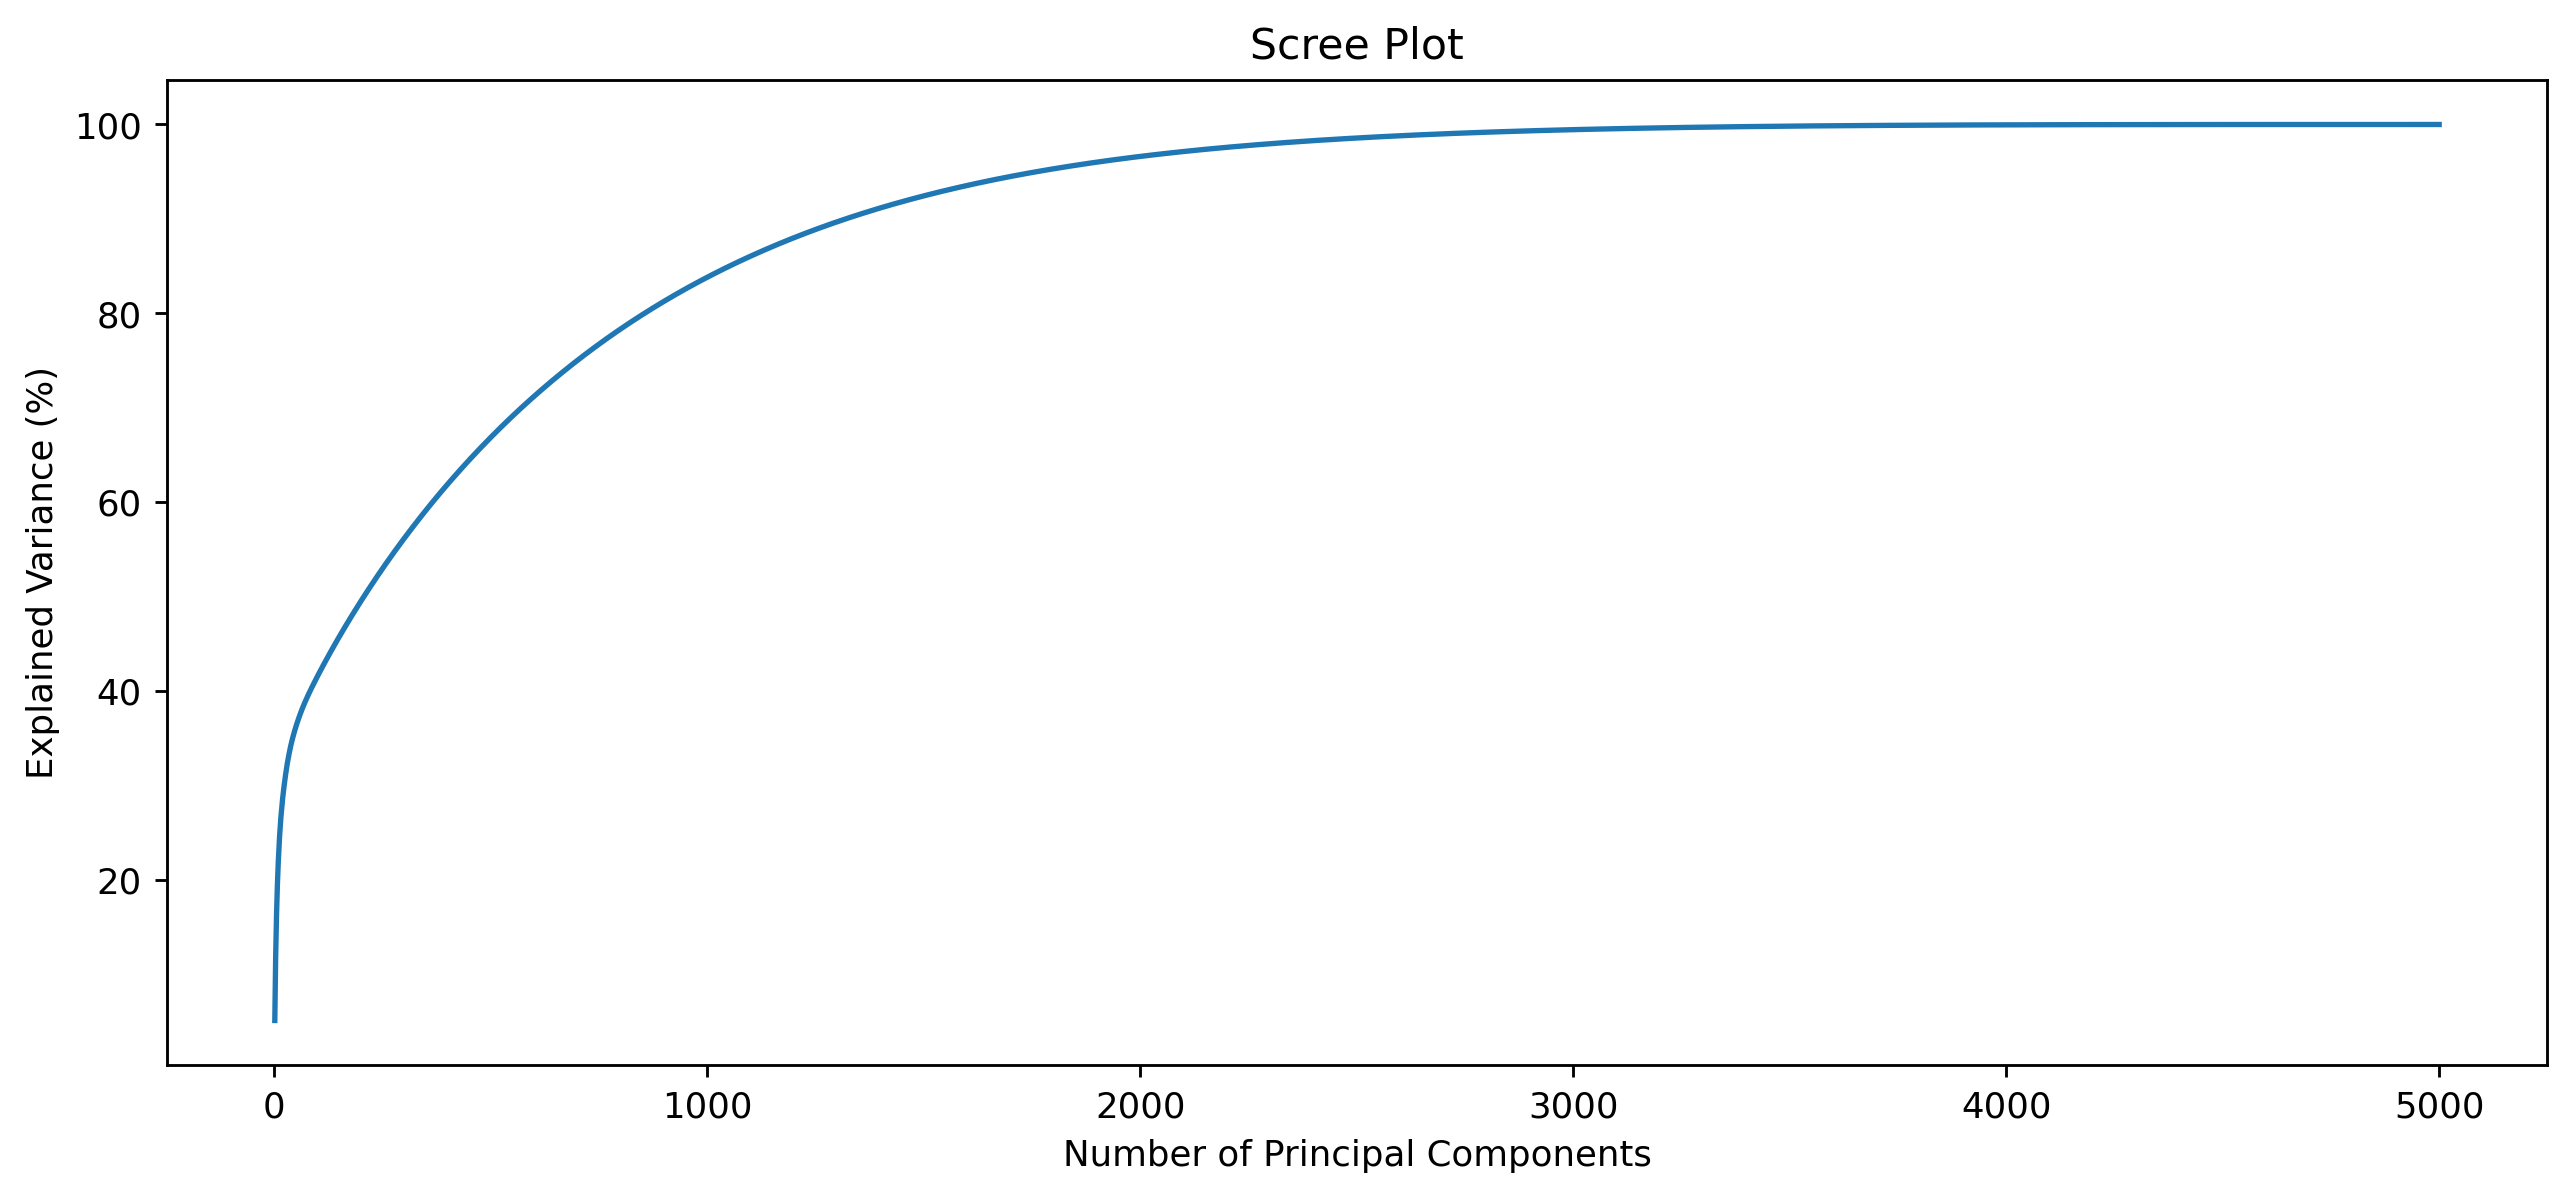

In [9]:
figure(figsize=(12, 5), dpi=256)

#---plotting a scree plot---
components = 5000
plt.plot(range(1,components+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.title('Scree Plot')
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance (%)")
plt.show()

#### Doing PCA to capture 85% Variance

In [10]:
#---running PCA capturing 85% variability of the data---
pca = PCA(n_components = 0.85)

start = time.time()  #---start time---

#---performing PCA on the data---
pca.fit(gisette_train_data)

end = time.time()  #---end time---

pca_time = end-start

print('Processing Time for performing PCA (in seconds):', pca_time)

Processing Time for performing PCA (in seconds): 87.27865147590637


In [11]:
#---some info about the Principal Components---
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

Cumulative Variances (Percentage):
[ 5.11131271  8.84503969 11.86893729 ... 84.9591201  84.9814177
 85.00368535]
Number of components: 1051


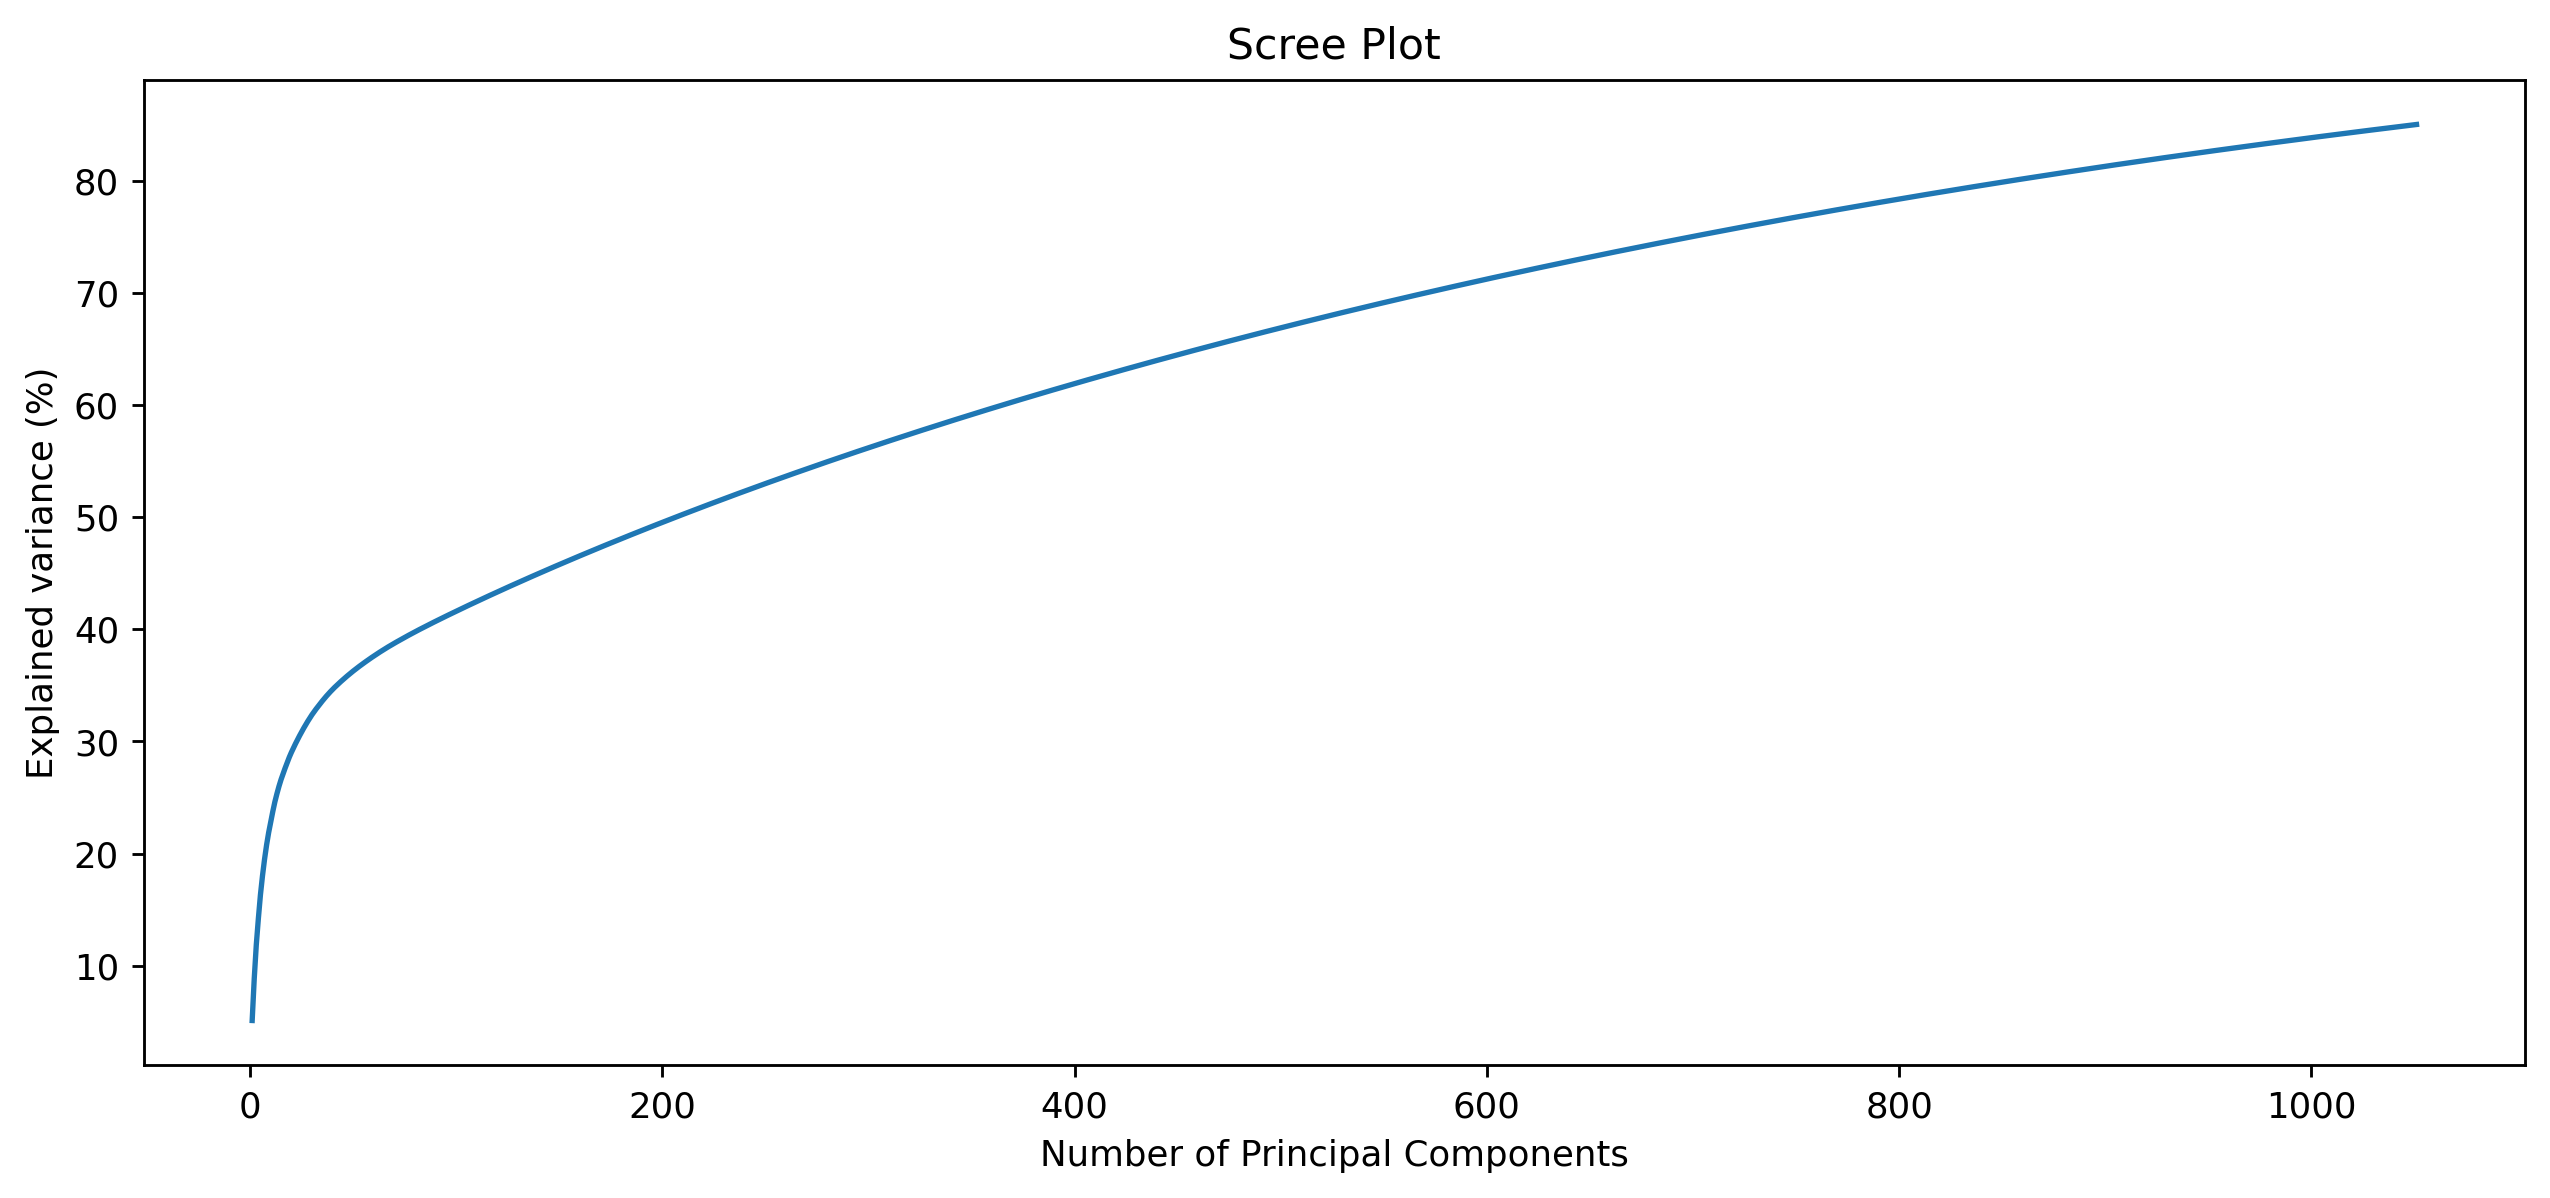

In [12]:
figure(figsize=(12, 5), dpi=256)

#---making the scree plot---
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.title('Scree Plot')
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained variance (%)")
plt.show()

#### Reading the Testing Dataset and cleaning as needed

In [13]:
gisette_test_data = pd.read_csv('gisette_valid.data', delimiter=' ', header=None)
gisette_test_data = gisette_test_data.dropna(axis=1, how='all')

gisette_test_data

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,688,0,0,0,0,0,0,952,0,870,...,0,0,0,0,0,0,494,0,769,0
1,778,758,0,0,0,0,0,708,0,991,...,0,0,0,770,0,0,0,0,0,0
2,469,0,816,0,0,0,0,0,0,0,...,0,0,0,467,0,0,0,417,0,0
3,0,0,0,0,0,571,991,983,0,983,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,949,0,991,...,0,0,0,0,0,0,0,0,976,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,511,0,0,0,0,0,0,0,0,...,991,0,0,852,0,0,0,0,0,0
996,0,0,599,0,0,0,0,910,0,0,...,0,0,0,0,0,0,0,0,0,707
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,742
998,0,0,0,0,0,0,0,968,0,0,...,0,0,0,773,0,0,0,0,0,0


#### Reading True Positive & Negative Values (Labels) for the Testing Dataset

In [14]:
gisette_test_labels = pd.read_csv('gisette_valid.labels', delimiter=' ', header=None)

gisette_test_labels

,0
0,1
1,1
2,-1
3,1
4,1
...,...
995,-1
996,1
997,1
998,-1


#### Training a model using Logistic Regression

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#---capturing 85% variability in the data using PCA---
_pca = PCA(n_components = 0.85)

#---creating a machine learning pipeline---
_model = LogisticRegression(max_iter = 5000)
log_regress_model = Pipeline([ ('pca', _pca), ('regressor', _model) ])

start = time.time()  #---start time---

#---training the model---
log_regress_model.fit(gisette_train_data, np.ravel(gisette_train_labels))

#---evaluating the model on the training and testing datasets---
train_pred = log_regress_model.predict(gisette_train_data)
test_pred = log_regress_model.predict(gisette_test_data)

end = time.time()  #---end time---

print('Percentage Accuracy on the Training Data:', accuracy_score(gisette_train_labels, train_pred)*100)
print('Percentage Accuracy on the Testing Data:', accuracy_score(gisette_test_labels, test_pred)*100)
print('Processing Time (in seconds):', end-start)

Percentage Accuracy on the Training Data: 100.0
Percentage Accuracy on the Testing Data: 96.3
Processing Time (in seconds): 92.47456693649292


#### Training a model using a linear kernel Support Vector Machine

In [16]:
from sklearn.svm import SVC

#---creating a machine learning pipeline---
_model = SVC(kernel='linear')
svm_linear_model = Pipeline([ ('pca', _pca), ('classifier', _model) ])

start = time.time()  #---start time---

#---training the model---
svm_linear_model.fit(gisette_train_data, np.ravel(gisette_train_labels))

#---evaluating the model on the training and testing datasets---
train_pred = svm_linear_model.predict(gisette_train_data)
test_pred = svm_linear_model.predict(gisette_test_data)

end = time.time()  #---end time---

print('Percentage Accuracy on the Training Data:', accuracy_score(gisette_train_labels, train_pred)*100)
print('Percentage Accuracy on the Testing Data:', accuracy_score(gisette_test_labels, test_pred)*100)
print('Processing Time (in seconds):', end-start)

Percentage Accuracy on the Training Data: 100.0
Percentage Accuracy on the Testing Data: 96.2
Processing Time (in seconds): 88.80905413627625


#### Training a model using a degree 2 polynomial kernel Support Vector Machine

In [17]:
#---creating a machine learning pipeline---
_model = SVC(kernel='poly', degree=2)
svm_poly_2_model = Pipeline([ ('pca', _pca), ('classifier', _model) ])

start = time.time()  #---start time---

#---training the model---
svm_poly_2_model.fit(gisette_train_data, np.ravel(gisette_train_labels))

#---evaluating the model on the training and testing datasets---
train_pred = svm_poly_2_model.predict(gisette_train_data)
test_pred = svm_poly_2_model.predict(gisette_test_data)

end = time.time()  #---end time---

print('Percentage Accuracy on the Training Data:', accuracy_score(gisette_train_labels, train_pred)*100)
print('Percentage Accuracy on the Testing Data:', accuracy_score(gisette_test_labels, test_pred)*100)
print('Processing Time (in seconds):', end-start)

Percentage Accuracy on the Training Data: 99.9
Percentage Accuracy on the Testing Data: 96.89999999999999
Processing Time (in seconds): 116.8787145614624


#### Training a model using a degree 3 polynomial kernel Support Vector Machine

In [18]:
#---creating a machine learning pipeline---
_model = SVC(kernel='poly', degree=3)
svm_poly_3_model = Pipeline([ ('pca', _pca), ('classifier', _model) ])

start = time.time()  #---start time---

#---training the model---
svm_poly_3_model.fit(gisette_train_data, np.ravel(gisette_train_labels))

#---evaluating the model on the training and testing datasets---
train_pred = svm_poly_3_model.predict(gisette_train_data)
test_pred = svm_poly_3_model.predict(gisette_test_data)

end = time.time()  #---end time---

print('Percentage Accuracy on the Training Data:', accuracy_score(gisette_train_labels, train_pred)*100)
print('Percentage Accuracy on the Testing Data:', accuracy_score(gisette_test_labels, test_pred)*100)
print('Processing Time (in seconds):', end-start)

Percentage Accuracy on the Training Data: 99.85000000000001
Percentage Accuracy on the Testing Data: 96.0
Processing Time (in seconds): 127.43759870529175


#### Training a model using a degree 4 polynomial kernel Support Vector Machine

In [19]:
#---creating a machine learning pipeline---
_model = SVC(kernel='poly', degree=4)
svm_poly_4_model = Pipeline([ ('pca', _pca), ('classifier', _model) ])

start = time.time()  #---start time---

#---training the model---
svm_poly_4_model.fit(gisette_train_data, np.ravel(gisette_train_labels))

#---evaluating the model on the training and testing datasets---
train_pred = svm_poly_4_model.predict(gisette_train_data)
test_pred = svm_poly_4_model.predict(gisette_test_data)

end = time.time()  #---end time---

print('Percentage Accuracy on the Training Data:', accuracy_score(gisette_train_labels, train_pred)*100)
print('Percentage Accuracy on the Testing Data:', accuracy_score(gisette_test_labels, test_pred)*100)
print('Processing Time (in seconds):', end-start)

Percentage Accuracy on the Training Data: 99.53333333333333
Percentage Accuracy on the Testing Data: 80.2
Processing Time (in seconds): 132.56178092956543
